# ANALISIS PRODUCCIÓN CONTEXTO GEPOL

Se desea saber en los documentos producidos en el sistema GEPOL:

•	¿Cuáles son los asuntos que más se generan?
•	¿Saber en qué contexto se producen?


## 1-Instalar las librerías necesarias

In [ ]:
#poner almohadilla si no se va usar
#!pip install openpyxl 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 33.3 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


## 2-Importar librerías 

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px 
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

## 3-Lectura de archivos (mes a mes)

In [ ]:
mes1=pd.read_excel('/work/PRODUCCION DOCUMENTAL POR MES/PRODUCCION MES ENERO.xlsx', sheet_name="Sheet1")
mes2=pd.read_excel('/work/PRODUCCION DOCUMENTAL POR MES/PRODUCCION MES FEBRERO.xlsx', sheet_name="Sheet1")
mes3=pd.read_excel('/work/PRODUCCION DOCUMENTAL POR MES/PRODUCCION MES MARZO.xlsx', sheet_name="Sheet1")
mes4=pd.read_excel('/work/PRODUCCION DOCUMENTAL POR MES/PRODUCCION MES ABRIL.xlsx', sheet_name="Sheet1")
mes5=pd.read_excel('/work/PRODUCCION DOCUMENTAL POR MES/PRODUCCION MES MAYO.xlsx', sheet_name="Sheet1")
mes6=pd.read_excel('/work/PRODUCCION DOCUMENTAL POR MES/PRODUCCION MES JUNIO.xlsx', sheet_name="Sheet1")
mes7=pd.read_excel('/work/PRODUCCION DOCUMENTAL POR MES/PRODUCCION MES JULIO.xlsx', sheet_name="Sheet1")
mes8=pd.read_excel('/work/PRODUCCION DOCUMENTAL POR MES/PRODUCCION MES AGOSTO.xlsx', sheet_name="Sheet1")
mes9=pd.read_excel('/work/PRODUCCION DOCUMENTAL POR MES/PRODUCCION MES SEPTIEMBRE.xlsx', sheet_name="Sheet1")
mes10=pd.read_excel('/work/PRODUCCION DOCUMENTAL POR MES/PRODUCCION MES OCTUBRE.xlsx', sheet_name="Sheet1")


## 4-Concatenar archivos en un solo conjunto de datos

In [ ]:
concat=pd.concat([mes1,mes2,mes3,mes4,
                  mes5,mes6,mes7,mes8,mes9,mes10], axis=0)
concat

,Unidad,Radicado,Enviado,Asunto,Estado,Tipo_documental,Contexto,Codigo_contexto,No_mes
0,DECAQ,GS-2023-008411-DECAQ,31/01/2023 23:58,Informe actividades régimen interno UPRES-DECAQ,Remitente,COMUNICACIÓN OFICIAL,TRAMITES ADMINISTRATIVOS Y OPERATIVOS,1,1
1,DECAQ,GS-2023-008410-DECAQ,31/01/2023 22:56,CAMPAÑA EDUCATIVA HOMICIDIO Y LESIONES PERSONAL,Remitente,COMUNICACIÓN OFICIAL,TRAMITES ADMINISTRATIVOS Y OPERATIVOS,1,1
2,DECAQ,GS-2023-008409-DECAQ,31/01/2023 22:28,Solicitud autorización desplazamiento cita méd...,Remitente,COMUNICACIÓN OFICIAL,TRAMITES ADMINISTRATIVOS Y OPERATIVOS,1,1
3,DECAQ,GS-2023-008407-DECAQ,31/01/2023 21:24,solicitud de encargo de comandantes,Remitente,COMUNICACIÓN OFICIAL,TRAMITES ADMINISTRATIVOS Y OPERATIVOS,1,1
4,DECAQ,GS-2023-008406-DECAQ,31/01/2023 21:21,Balance 1 encuentro de inspectores de Policía,Remitente,COMUNICACIÓN OFICIAL,TRAMITES ADMINISTRATIVOS Y OPERATIVOS,1,1
...,...,...,...,...,...,...,...,...,...
8505,DECAQ,GS-2023-083250-DECAQ,01/10/2023 00:50,Cumplimiento GS-2023-053665-DECAQ ejecución de...,Remitente,COMUNICACIÓN OFICIAL,TRAMITES ADMINISTRATIVOS Y OPERATIVOS,4,10
8506,DECAQ,GS-2023-083249-DECAQ,01/10/2023 00:32,Informe novedad homicidio,Remitente,COMUNICACIÓN OFICIAL,TRAMITES ADMINISTRATIVOS Y OPERATIVOS,4,10
8507,DECAQ,GS-2023-083248-DECAQ,01/10/2023 00:30,Cumplimiento GS-2023-067145-DECAQ ejecutar acc...,Remitente,COMUNICACIÓN OFICIAL,TRAMITES ADMINISTRATIVOS Y OPERATIVOS,4,10
8508,DECAQ,GS-2023-083247-DECAQ,01/10/2023 00:12,Cumplimiento plan choque 360 mediante comunica...,Remitente,COMUNICACIÓN OFICIAL,TRAMITES ADMINISTRATIVOS Y OPERATIVOS,4,10


## 5-Exportar set de datos a un archivo excel

In [ ]:
concat.to_excel("/work/RAW DATA/analisis2023.xlsx")

## 6-Lectura del archivo excel concatenado

In [ ]:
concated=pd.read_excel('/work/RAW DATA/analisis2023.xlsx')
concated

,Unnamed: 0,Unidad,Radicado,Enviado,Asunto,Estado,Tipo_documental,Contexto,Codigo_contexto,No_mes
0,0,DECAQ,GS-2023-008411-DECAQ,31/01/2023 23:58,Informe actividades régimen interno UPRES-DECAQ,Remitente,COMUNICACIÓN OFICIAL,TRAMITES ADMINISTRATIVOS Y OPERATIVOS,1,1
1,1,DECAQ,GS-2023-008410-DECAQ,31/01/2023 22:56,CAMPAÑA EDUCATIVA HOMICIDIO Y LESIONES PERSONAL,Remitente,COMUNICACIÓN OFICIAL,TRAMITES ADMINISTRATIVOS Y OPERATIVOS,1,1
2,2,DECAQ,GS-2023-008409-DECAQ,31/01/2023 22:28,Solicitud autorización desplazamiento cita méd...,Remitente,COMUNICACIÓN OFICIAL,TRAMITES ADMINISTRATIVOS Y OPERATIVOS,1,1
3,3,DECAQ,GS-2023-008407-DECAQ,31/01/2023 21:24,solicitud de encargo de comandantes,Remitente,COMUNICACIÓN OFICIAL,TRAMITES ADMINISTRATIVOS Y OPERATIVOS,1,1
4,4,DECAQ,GS-2023-008406-DECAQ,31/01/2023 21:21,Balance 1 encuentro de inspectores de Policía,Remitente,COMUNICACIÓN OFICIAL,TRAMITES ADMINISTRATIVOS Y OPERATIVOS,1,1
...,...,...,...,...,...,...,...,...,...,...
74273,8505,DECAQ,GS-2023-083250-DECAQ,01/10/2023 00:50,Cumplimiento GS-2023-053665-DECAQ ejecución de...,Remitente,COMUNICACIÓN OFICIAL,TRAMITES ADMINISTRATIVOS Y OPERATIVOS,4,10
74274,8506,DECAQ,GS-2023-083249-DECAQ,01/10/2023 00:32,Informe novedad homicidio,Remitente,COMUNICACIÓN OFICIAL,TRAMITES ADMINISTRATIVOS Y OPERATIVOS,4,10
74275,8507,DECAQ,GS-2023-083248-DECAQ,01/10/2023 00:30,Cumplimiento GS-2023-067145-DECAQ ejecutar acc...,Remitente,COMUNICACIÓN OFICIAL,TRAMITES ADMINISTRATIVOS Y OPERATIVOS,4,10
74276,8508,DECAQ,GS-2023-083247-DECAQ,01/10/2023 00:12,Cumplimiento plan choque 360 mediante comunica...,Remitente,COMUNICACIÓN OFICIAL,TRAMITES ADMINISTRATIVOS Y OPERATIVOS,4,10


## 7-Eliminar columna no relevante llamada (Unnamed: 0)

In [ ]:
concated = concated.drop("Unnamed: 0", axis=1)
concated

,Unidad,Radicado,Enviado,Asunto,Estado,Tipo_documental,Contexto,Codigo_contexto,No_mes
0,DECAQ,GS-2023-008411-DECAQ,31/01/2023 23:58,Informe actividades régimen interno UPRES-DECAQ,Remitente,COMUNICACIÓN OFICIAL,TRAMITES ADMINISTRATIVOS Y OPERATIVOS,1,1
1,DECAQ,GS-2023-008410-DECAQ,31/01/2023 22:56,CAMPAÑA EDUCATIVA HOMICIDIO Y LESIONES PERSONAL,Remitente,COMUNICACIÓN OFICIAL,TRAMITES ADMINISTRATIVOS Y OPERATIVOS,1,1
2,DECAQ,GS-2023-008409-DECAQ,31/01/2023 22:28,Solicitud autorización desplazamiento cita méd...,Remitente,COMUNICACIÓN OFICIAL,TRAMITES ADMINISTRATIVOS Y OPERATIVOS,1,1
3,DECAQ,GS-2023-008407-DECAQ,31/01/2023 21:24,solicitud de encargo de comandantes,Remitente,COMUNICACIÓN OFICIAL,TRAMITES ADMINISTRATIVOS Y OPERATIVOS,1,1
4,DECAQ,GS-2023-008406-DECAQ,31/01/2023 21:21,Balance 1 encuentro de inspectores de Policía,Remitente,COMUNICACIÓN OFICIAL,TRAMITES ADMINISTRATIVOS Y OPERATIVOS,1,1
...,...,...,...,...,...,...,...,...,...
74273,DECAQ,GS-2023-083250-DECAQ,01/10/2023 00:50,Cumplimiento GS-2023-053665-DECAQ ejecución de...,Remitente,COMUNICACIÓN OFICIAL,TRAMITES ADMINISTRATIVOS Y OPERATIVOS,4,10
74274,DECAQ,GS-2023-083249-DECAQ,01/10/2023 00:32,Informe novedad homicidio,Remitente,COMUNICACIÓN OFICIAL,TRAMITES ADMINISTRATIVOS Y OPERATIVOS,4,10
74275,DECAQ,GS-2023-083248-DECAQ,01/10/2023 00:30,Cumplimiento GS-2023-067145-DECAQ ejecutar acc...,Remitente,COMUNICACIÓN OFICIAL,TRAMITES ADMINISTRATIVOS Y OPERATIVOS,4,10
74276,DECAQ,GS-2023-083247-DECAQ,01/10/2023 00:12,Cumplimiento plan choque 360 mediante comunica...,Remitente,COMUNICACIÓN OFICIAL,TRAMITES ADMINISTRATIVOS Y OPERATIVOS,4,10


## 8-Descripción del conjunto de datos

In [ ]:
concated.describe()

,Codigo_contexto,No_mes
count,74278.000000,74278.000000
mean,2.932308,5.718611
std,1.432411,2.844891
min,1.000000,1.000000
25%,1.000000,3.000000
50%,4.000000,6.000000
75%,4.000000,8.000000
max,4.000000,10.000000


## 9-Total documentos producidos en el GEPOL

In [ ]:
concated['Radicado'].count()
print('El número de documentos radicados en el GEPOL es de', concated['Radicado'].count(),'en lo transcurrido del año 2023')

El número de documentos radicados en el GEPOL es de 74278 en lo transcurrido del año 2023


## 10-Crear gráfico de torta

In [ ]:
#Crear gráfico de torta 
fig = px.pie(concated, names='Contexto', values='Codigo_contexto', title= 'PORCENTAJE PRODUCCION DOCUMENTAL GEPOL AÑO 2023 - POR CONTEXTOS ') 
 
#Centrar título
fig.update_layout(title_x=0.5)

#Añadir información a la leyenda 
fig.update_layout(legend_title_text='Contextos de producción documental:')

#Mostrar gráfico 
fig.show() 

fig.write_html("/work/OUTPUTS/grafico_torta_porcontexto.html")

## 11-Aplicación de algoritmo de agrupamiento (para el caso de estudio)

In [ ]:
# Seleccionar las columnas para la clasificación
X = concated[['No_mes','Codigo_contexto']]

# Inicializar el modelo de k-means
kmeans = KMeans(n_clusters=3)

# Entrenar el modelo con los datos
kmeans.fit(X)

# Obtener las etiquetas de los clusters y agregarlas al DataFrame
labels = kmeans.labels_
concated['cluster'] = labels

# Imprimir el DataFrame con las etiquetas de los clusters
print("Se procede con imprimir las etiquetas con los clusters así:",concated)

Se procede con imprimir las etiquetas con los clusters así:       Unidad              Radicado           Enviado  \
0      DECAQ  GS-2023-008411-DECAQ  31/01/2023 23:58   
1      DECAQ  GS-2023-008410-DECAQ  31/01/2023 22:56   
2      DECAQ  GS-2023-008409-DECAQ  31/01/2023 22:28   
3      DECAQ  GS-2023-008407-DECAQ  31/01/2023 21:24   
4      DECAQ  GS-2023-008406-DECAQ  31/01/2023 21:21   
...      ...                   ...               ...   
74273  DECAQ  GS-2023-083250-DECAQ  01/10/2023 00:50   
74274  DECAQ  GS-2023-083249-DECAQ  01/10/2023 00:32   
74275  DECAQ  GS-2023-083248-DECAQ  01/10/2023 00:30   
74276  DECAQ  GS-2023-083247-DECAQ  01/10/2023 00:12   
74277  DECAQ  GS-2023-083246-DECAQ  01/10/2023 00:08   

                                                  Asunto     Estado  \
0        Informe actividades régimen interno UPRES-DECAQ  Remitente   
1        CAMPAÑA EDUCATIVA HOMICIDIO Y LESIONES PERSONAL  Remitente   
2      Solicitud autorización desplazamiento cita méd.

## 12-Crear gráfica de dispersión (de acuerdo a lo arrojado por el algoritmo de machine learning)

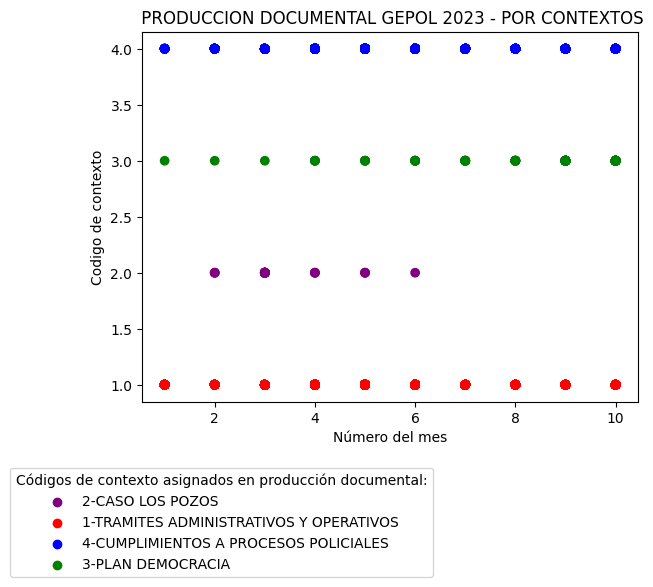

In [ ]:
#Asignar colores basados en el valor de la columna 'Codigo_contexto'
color_mapping = {
    2: 'purple',
    1: 'red',
    4: 'blue',
    3: 'green'
}

#Agregar una nueva columna 'Cluster_color' con colores asignados en el dataframe
concated['Cluster_color'] = concated['Codigo_contexto'].map(color_mapping)

#Graficar los puntos con los colores asignados
plt.scatter(concated['No_mes'], concated['Codigo_contexto'], c=concated['Cluster_color'], marker='o')

#Definir la leyenda en el eje
legend_labels = {
    2: '2-CASO LOS POZOS',
    1: '1-TRAMITES ADMINISTRATIVOS Y OPERATIVOS',
    4: '4-CUMPLIMIENTOS A PROCESOS POLICIALES',
    3: '3-PLAN DEMOCRACIA'
}

for key, value in legend_labels.items():
    plt.scatter([], [], c=color_mapping[key], label=value)

#Mostrar la leyenda con su respectivo título, se añade el metodo "bbox_to_anchor" para ajustar la imagen
plt.legend(title="Códigos de contexto asignados en producción documental:", bbox_to_anchor=(0.6,-0.16))

#Montar las leyendas en los ejes
plt.xlabel('Número del mes')
plt.ylabel('Codigo de contexto')
plt.title(' PRODUCCION DOCUMENTAL GEPOL 2023 - POR CONTEXTOS')
plt.show()
#plt.savefig('/work/OUTPUTS/scatter_fig_context')

# 13-Analisis de la situación

- La mayor parte del tiempo, se gastó fue en el domado y limpieza de los datos, ya que se tuvo que extraer, estandarizar y concatenar el conjunto de datos.

- En la producción documental mensual, hubo un mayor volumen de información en lo que respecta en "CUMPLIMIENTO A PROCESOS POLICIALES".

- Hay una menor producción mensual referente a los tramites y antecedentes administrativos.

- En los meses de febrero, marzo, abril, mayo y junio, hubo producción referente al caso de los Pozos en San Vicente del Caguán (Caquetá)

- Referente al contexto del "PLAN DEMOCRACIA" en todos los meses, se elaboraron documentos e información referente al tema.

# 14-Conclusiones

Con el desarrollo del ejercicio se cumple con las preguntas principales del caso, que viene siendo cuáles son los asuntos que más se generan y saber  en qué contexto se producen; los documentos en el Sistema de Gestión Documental Electrónica de Archivo (SGDEA), que en este caso es el Gestor de Documentos Policiales (GEPOL) y se pudo clasificar o agrupar con el algoritmo de K-MEANS o "vecino cercano" con la librería de ciencia de datos Sckit-Learn y el lenguaje de programación Python, responder la duda o caso de estudio.

Se tomó los asuntos de los documentos como punto de partida, para poderlos etiquetar, asignarles código e incluso un color que pueda diferenciarse de otros; así mismo, organizandolos por meses para así tener un plano o esquema de la situación.

# 15-Referencias Bibliográficas

Grus, J. (2023). Ciencia de Datos desde cero. segunda edición: Principios básicos con Python. Comercial Grupo ANAYA, S.A.

Kleppmann, M. (2022). Diseño de aplicaciones mediante el uso intensivo de datos. Marcombo.

McKinney, W. (2017). Python for Data Analysis: Data Wrangling with Pandas, Numpy, and Ipython. O’Reilly Media.

McKinney, W. (2023). Python para análisis de datos. ANAYA MULTIMEDIA.

Roldán, R. C., Martín, E. M., & Rodríguez, A. R. (2019). Big data con Python: recolección, almacenamiento y proceso.

Elaborado por: 

Wagner Alonso Fernández Villalobos
Profesional en Administración Informática
